<a href="https://colab.research.google.com/github/hfanahita/Nonlinear-Programming/blob/HW2/Pure_Newton_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pure Newton Method for the Function aX^2+by^2

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


##Calculating the Gradient and the Descent Direction for aX^2+by^2

In [11]:
global a, b
def gradient(x):
  return np.array([2*a*x[0],2*b*x[1]])
def d_k(x):
  return np.array([-x[0], -x[1]])
def f(x):
  return a*(x[0]**2)+b*(x[1]**2)

##Implementation of Pure Newton's Method

In [13]:
def pure_newton(epsilon, x_0):
    number_of_iterations = 1
    d = d_k(x_0)
    x_k = x_0 + d
    while np.linalg.norm(gradient(x_k)) > epsilon:
      number_of_iterations += 1
      d = d_k(x_k)
      x_k = x_k + d
    return x_k, number_of_iterations

##Running Pure Newton's Method for x^2 + 0.01 y^2 with x_0 = (0.01, 1)


In [15]:
a = 1
b = 0.001
result = pure_newton(10**(-5), np.array([0.01, 1.0]))
x_k = result[0]
print("Number of iterations: ", result[1])
print("x_", result[1], ": ", x_k)
print("f(x_", result[1],"):", f(x_k))

Number of iterations:  1
x_ 1 :  [0. 0.]
f(x_ 1 ): 0.0


##Impact of the parameters

###Changing the initial point x_0
As the plots below illustrate, changing the initial point (x₀) in this method and for this function does not change the convergence of the method, nor does it change the number of iterations. This aligns with the following Theorem discussed in class, as the Hessian of f is a diagonal matrix with positive diagonal elements, and therefore positive definite.

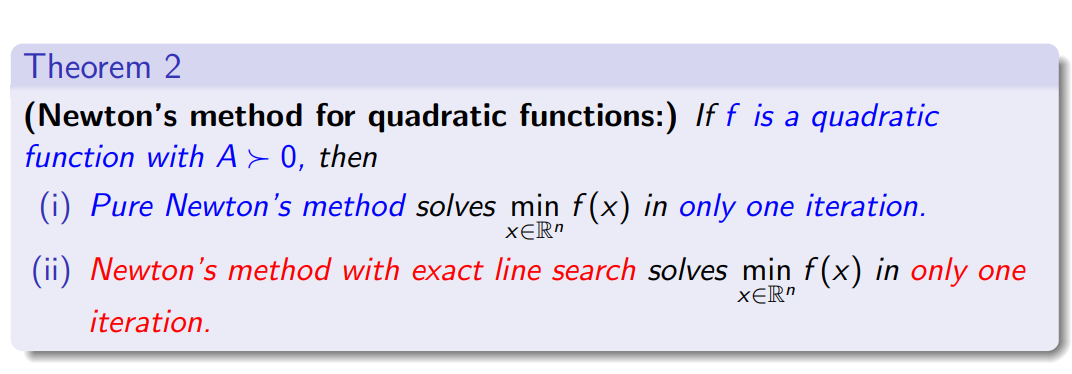

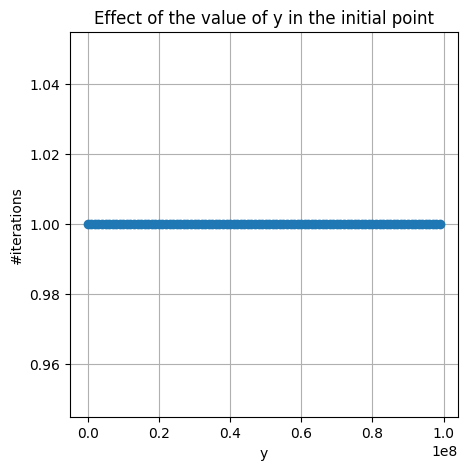

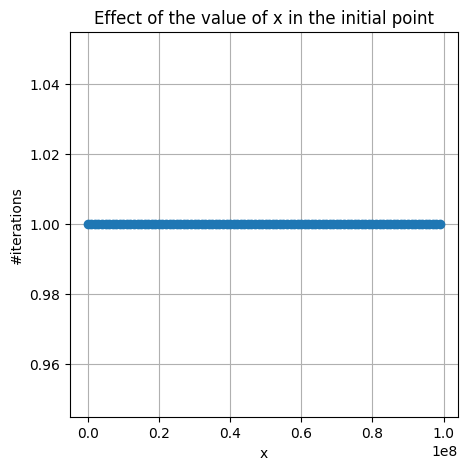

In [22]:
# x_0 = (x, y)
a = 1
b = 0.001
n = 100
values = np.linspace(0.00001, 100000000, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for y in values:
  result = pure_newton(10**(-5), np.array([0.01, y]))
  number_of_iterations[i] = result[1]
  i += 1

plt.figure(figsize=(5, 5))
plt.plot(values, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('y')
plt.ylabel('#iterations')
plt.title('Effect of the value of y in the initial point')
plt.grid(True)
plt.show()

n = 100
values = np.linspace(0.00001, 100000000, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for x in values:
  result = pure_newton(10**(-5), np.array([x, 1]))
  number_of_iterations[i] = result[1]
  i += 1

plt.figure(figsize=(5, 5))
plt.plot(values, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('x')
plt.ylabel('#iterations')
plt.title('Effect of the value of x in the initial point')
plt.grid(True)
plt.show()


###Changing epsilon
As expected, changing the epsilon value here does not affect the number of iterations. This occurs because the direction, d_k = [x, y], guarantees that after the first iteration, the next point will be (0, 0). Consequently, the gradient of the function f at this point will be exactly zero.

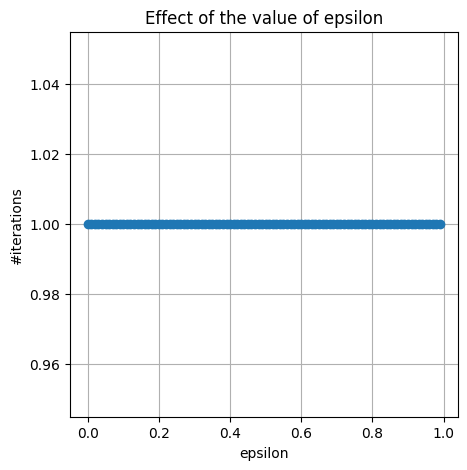

In [24]:
a = 1
b = 0.001
n = 100
values = np.linspace(0.00000000000001, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for epsilon in values:
  result = pure_newton(epsilon, np.array([0.01, 1]))
  number_of_iterations[i] = result[1]
  i += 1

plt.figure(figsize=(5, 5))
plt.plot(values, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('epsilon')
plt.ylabel('#iterations')
plt.title('Effect of the value of epsilon')
plt.grid(True)
plt.show()

##Changing the coefficient of y
As the plot shows, changing the coefficient of y within the given interval does not affect the number of iterations. This occurs because modifying the y-coefficient in this interval preserves the positive definiteness of the Hessian of f.

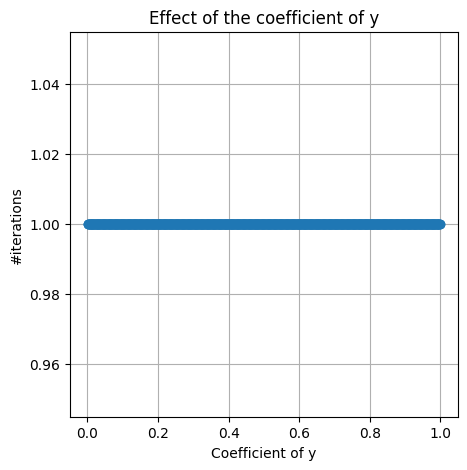

In [27]:
a = 1
b = 0.001
n = 1000
coefficients = np.linspace(0.001, 1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for b in coefficients:
  result = pure_newton(10**(-5), np.array([0.01, 1]))
  number_of_iterations[i] = result[1]
  i += 1

plt.figure(figsize=(5, 5))
plt.plot(coefficients, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Coefficient of y')
plt.ylabel('#iterations')
plt.title('Effect of the coefficient of y')
plt.grid(True)
plt.show()